<a href="https://colab.research.google.com/github/panchamdesai777/Hackathons/blob/master/hR_ANALYTICS.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#importing all the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.style as style # for styling the graphss
# style.available (to know the available list of styles)
style.use('ggplot') # chosen style
plt.rc('xtick',labelsize=13) # to globally set the tick size
plt.rc('ytick',labelsize=13) # to globally set the tick size
# To print multiple outputs together
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# Change column display number during print
pd.set_option('display.max_columns', 500)
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')
# To display float with 2 decimal, avoid scientific printing
pd.options.display.float_format = '{:.2f}'.format
import seaborn as sns
import warnings
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_recall_curve, auc, roc_auc_score, roc_curve, recall_score, classification_report
from sklearn.metrics import roc_auc_score ,mean_squared_error,accuracy_score,classification_report,roc_curve,confusion_matrix,precision_score,f1_score
import itertools
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.preprocessing import LabelEncoder,StandardScaler

In [354]:
from google.colab import files
uploaded = files.upload()

Saving train.csv to train (8).csv


In [365]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
df = pd.read_csv(io.BytesIO(uploaded['train.csv']))
df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
0,23798,city_149,0.69,Male,Has relevent experience,no_enrollment,Graduate,STEM,3,100-500,Pvt Ltd,1,106,0
1,29166,city_83,0.92,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,<10,Funded Startup,1,69,0
2,46,city_16,0.91,NaN,Has relevent experience,no_enrollment,Graduate,STEM,6,50-99,Public Sector,2,4,0
3,18527,city_64,0.67,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,50-99,Pvt Ltd,1,26,0
4,21751,city_100,0.89,NaN,No relevent experience,no_enrollment,Masters,STEM,8,NaN,NaN,2,88,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18354,25366,city_103,0.92,Male,Has relevent experience,Full time course,Graduate,STEM,5,<10,Pvt Ltd,1,71,0
18355,25545,city_160,0.92,Male,No relevent experience,no_enrollment,Graduate,Humanities,15,50-99,Pvt Ltd,1,160,0
18356,11514,city_114,0.93,Male,Has relevent experience,no_enrollment,Masters,STEM,11,50-99,Pvt Ltd,3,18,0
18357,1689,city_75,0.94,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,10/49,Pvt Ltd,3,41,0


In [366]:
# Function to identify the number of missing values in every feature
def missing_data(dataset):
    total = dataset.isnull().sum().sort_values(ascending=False)
    percent = (dataset.isnull().sum()/dataset.isnull().count()).sort_values(ascending=False)
    missing_data = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    return missing_data
    
    
missing_data = missing_data(df)
print(missing_data)

                        Total  Percent
company_type             5039     0.27
company_size             4779     0.26
gender                   4098     0.22
major_discipline         2838     0.15
education_level           457     0.02
last_new_job              367     0.02
enrolled_university       342     0.02
experience                 59     0.00
target                      0     0.00
training_hours              0     0.00
relevent_experience         0     0.00
city_development_index      0     0.00
city                        0     0.00
enrollee_id                 0     0.00


In [367]:
df.nunique()

enrollee_id               18359
city                        123
city_development_index       93
gender                        3
relevent_experience           2
enrolled_university           3
education_level               5
major_discipline              6
experience                   22
company_size                  8
company_type                  6
last_new_job                  6
training_hours              241
target                        2
dtype: int64

In [0]:
#Creating df for modelling
model_df=df[['city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours', 'target']]


In [0]:
#Label encoding
model_df['gender']=model_df['gender'].str.replace('Male','1')
model_df['gender']=model_df['gender'].str.replace('Female','0')
model_df.fillna('Other',inplace=True)
model_df['gender']=model_df['gender'].str.replace('Other','2')
model_df['gender']=model_df['gender'].astype(int)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
model_df['enrolled_university'].fillna('Other',inplace=True)
model_df['enrolled_university']=le.fit_transform(model_df['enrolled_university'])
model_df['company_size']=le.fit_transform(model_df['company_size'])
model_df['experience']=le.fit_transform(model_df['experience'])
model_df['education_level']=le.fit_transform(model_df['education_level'])
model_df['major_discipline']=le.fit_transform(model_df['major_discipline'])
model_df['company_type']=le.fit_transform(model_df['company_type'])
model_df['relevent_experience']=le.fit_transform(model_df['relevent_experience'])
model_df['last_new_job']=le.fit_transform(model_df['last_new_job'])

In [153]:
pip install catboost

     |████████████████████████████████| 64.8MB 56kB/s 


In [372]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18359 entries, 0 to 18358
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city_development_index  18359 non-null  float64
 1   gender                  18359 non-null  int64  
 2   relevent_experience     18359 non-null  int64  
 3   enrolled_university     18359 non-null  int64  
 4   education_level         18359 non-null  int64  
 5   major_discipline        18359 non-null  int64  
 6   experience              18359 non-null  int64  
 7   company_size            18359 non-null  int64  
 8   company_type            18359 non-null  int64  
 9   last_new_job            18359 non-null  int64  
 10  training_hours          18359 non-null  int64  
 11  target                  18359 non-null  int64  
dtypes: float64(1), int64(11)
memory usage: 1.7 MB


In [435]:
from sklearn.preprocessing import LabelEncoder,StandardScaler
model = LogisticRegression(C =0.01,penalty='l2',solver='liblinear',random_state=9)
scaler=StandardScaler()
X=model_df.drop('target',1)
y=model_df['target']
#Train-test-split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
smote=SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
model.fit(X_train_sm, y_train_sm)
y_pred=model.predict(X_test)
auc = roc_auc_score(y_test, y_pred)
print('Roc auc score:',auc)


LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

Roc auc score: 0.6056791563049543


In [393]:
#hyperparameter tuning
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(random_state=9)
scaler=StandardScaler()
X=model_df.drop('target',1)
y=model_df['target']
X=scaler.fit_transform(X)
smote=SMOTE()
X_sm,y_sm=smote.fit_sample(X,y)

solvers = ['newton-cg', 'lbfgs', 'liblinear']
penalty = ['l2']
c_values = [100,50,20,10,5,1.0, 0.1,0.05,0.01]
# define grid search
grid = dict(solver=solvers,penalty=penalty,C=c_values)
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
grid_search = GridSearchCV(estimator=model, param_grid=grid, n_jobs=-1, cv=cv, scoring='accuracy',error_score=0)
grid_result = grid_search.fit(X_sm, y_sm)
# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.611899 using {'C': 0.01, 'penalty': 'l2', 'solver': 'liblinear'}
0.611752 (0.009096) with: {'C': 100, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.009096) with: {'C': 100, 'penalty': 'l2', 'solver': 'lbfgs'}
0.611752 (0.009096) with: {'C': 100, 'penalty': 'l2', 'solver': 'liblinear'}
0.611752 (0.009096) with: {'C': 50, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.009096) with: {'C': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
0.611752 (0.009096) with: {'C': 50, 'penalty': 'l2', 'solver': 'liblinear'}
0.611752 (0.009096) with: {'C': 20, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.009096) with: {'C': 20, 'penalty': 'l2', 'solver': 'lbfgs'}
0.611752 (0.009096) with: {'C': 20, 'penalty': 'l2', 'solver': 'liblinear'}
0.611752 (0.009096) with: {'C': 10, 'penalty': 'l2', 'solver': 'newton-cg'}
0.611752 (0.009096) with: {'C': 10, 'penalty': 'l2', 'solver': 'lbfgs'}
0.611752 (0.009096) with: {'C': 10, 'penalty': 'l2', 'solver': 'liblinear'}
0.611752 (0.009096) with: {'

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=9, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

Best Threshold=0.492766, G-Mean=0.604


Text(0.5, 0, 'False Positive Rate')

Text(0, 0.5, 'True Positive Rate')

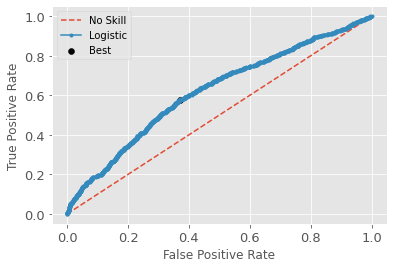

In [432]:
from sklearn.metrics import roc_curve
from matplotlib import pyplot
model = LogisticRegression(random_state=9)
scaler=StandardScaler()
X=model_df.drop('target',1)
y=model_df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=9)
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
smote=SMOTE()
X_train_sm,y_train_sm=smote.fit_sample(X_train,y_train)
model.fit(X_train_sm, y_train_sm)


# predict probabilities
yhat = model.predict_proba(X_test)
# keep probabilities for the positive outcome only
yhat = yhat[:, 1]
# calculate roc curves
fpr, tpr, thresholds = roc_curve(y_test, yhat)
# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))
# locate the index of the largest g-mean
ix = np.argmax(gmeans)
print('Best Threshold=%f, G-Mean=%.3f' % (thresholds[ix], gmeans[ix]))
# plot the roc curve for the model
pyplot.plot([0,1], [0,1], linestyle='--', label='No Skill')
pyplot.plot(fpr, tpr, marker='.', label='Logistic')
pyplot.scatter(fpr[ix], tpr[ix], marker='o', color='black', label='Best')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
# show the plot
pyplot.show()

## **Test Data**

In [403]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test (3).csv


In [404]:
#Loading The Dataset
import io
#The command written below is generally used to load .csv format file or .data format file.
test_df = pd.read_csv(io.BytesIO(uploaded['test.csv']))
test_df

,enrollee_id,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
0,16548,city_33,0.45,NaN,No relevent experience,Full time course,Graduate,STEM,<1,1000-4999,Public Sector,NaN,15
1,12036,city_28,0.94,Male,No relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,1,94
2,11061,city_103,0.92,Male,No relevent experience,Full time course,Graduate,STEM,3,NaN,NaN,1,17
3,5032,city_104,0.92,Male,No relevent experience,no_enrollment,Phd,STEM,>20,50-99,Pvt Ltd,2,76
4,17599,city_77,0.83,Male,Has relevent experience,no_enrollment,Graduate,STEM,6,<10,Pvt Ltd,2,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
15016,11308,city_46,0.76,NaN,Has relevent experience,no_enrollment,Masters,STEM,>20,500-999,Pvt Ltd,>4,68
15017,14612,city_21,0.62,Male,Has relevent experience,Full time course,Masters,STEM,4,1000-4999,Pvt Ltd,1,320
15018,33346,city_16,0.91,Male,Has relevent experience,no_enrollment,High School,NaN,9,1000-4999,Pvt Ltd,4,13
15019,14506,city_64,0.67,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,1,38


In [0]:
#Label encoding
test_df['gender']=test_df['gender'].str.replace('Male','1')
test_df['gender']=test_df['gender'].str.replace('Female','0')
test_df.fillna('Other',inplace=True)
test_df['gender']=test_df['gender'].str.replace('Other','2')
test_df['gender']=test_df['gender'].astype(int)

In [0]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
test_df['enrolled_university'].fillna('Other',inplace=True)
test_df['enrolled_university']=le.fit_transform(test_df['enrolled_university'])
test_df['company_size']=le.fit_transform(test_df['company_size'])
test_df['experience']=le.fit_transform(test_df['experience'])
test_df['education_level']=le.fit_transform(test_df['education_level'])
test_df['major_discipline']=le.fit_transform(test_df['major_discipline'])
test_df['company_type']=le.fit_transform(test_df['company_type'])
test_df['relevent_experience']=le.fit_transform(test_df['relevent_experience'])
test_df['last_new_job']=le.fit_transform(test_df['last_new_job'])

In [0]:
id_col=test_df['enrollee_id']
test_df=test_df[['city_development_index', 'gender',
       'relevent_experience', 'enrolled_university', 'education_level',
       'major_discipline', 'experience', 'company_size', 'company_type',
       'last_new_job', 'training_hours']]

In [0]:
test_df=scaler.transform(test_df)
y_pred=model.predict(test_df)

In [410]:
A=y_pred
A=pd.DataFrame(A)
A

,0
0,1
1,1
2,1
3,0
4,1
...,...
15016,0
15017,1
15018,0
15019,1


In [412]:
#Creating Final Submission file
submissions = pd.concat([id_col,A], axis=1)
submissions.to_csv('log_1_submission.csv', index=False)
submissions

,enrollee_id,0
0,16548,1
1,12036,1
2,11061,1
3,5032,0
4,17599,1
...,...,...
15016,11308,0
15017,14612,1
15018,33346,0
15019,14506,1


In [0]:
from google.colab import files
files.download('log_1_submission.csv')